<a href="https://colab.research.google.com/github/koalalovepabro/Deep-Learning/blob/main/Dogs_vs_Cats_keras_%2302_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a class="anchor" id="0."></a>
# Content

* [1. Summary](#1.)
* [2. Cats and Dogs Dataset](#2.)
* * [2.1. Randomly Visualization of Samples in the Dataset](#2.1.)
* * [2.2. Some Evaluations About the Dataset](#2.2.)
* [3. Convolutional Neural Network(CNN)](#3.)
* * [3.1. Implementing CNN Architecture with Keras](#3.1.)
* [4.Transfer Learning 1: Feature Extractor](#4.)

In [ ]:
import numpy as np # linear algebra ( 선형 대수학 )
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from keras import applications

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import glob
import os
print("Cats&Dogs Dataset Folder Contain:",os.listdir("../input"))

Using TensorFlow backend.


Cats&Dogs Dataset Folder Contain: ['test1.zip', 'train.zip', 'sampleSubmission.csv']


[Go to Content Menu](#0.)

# <a class="anchor" id="1."></a>1. Summary

In this study, CNN architecture and transfer learning techniques will be used to classify cats and dogs in the Cats & Dogs dataset. Firstly, the dataset will be visualized and evaluated. Then, a CNN architecture will be created with keras, and trained and estimated on training and test sets respectively.  Then transfer learning technques will be applied on the dataset. 

Transfer learning is one of the important advantages of deep learning. There are two different transfer learning types used on image data; feature extractor and fine tunning. In this kernel transfer learning used as feature extractor on the Cats & Dogs dataset.

In this study you will learn:

* Visualization of images in form of gallery
* Use of CNN architecture in image classification.
* Transfer Learning Type 1-Feature Extractor : pretrained model used such as feature extractor.

Accuracy performace of the approaches as follows:

* Custom CNN accurcy rate is %80(+-2)
* Transfer Learning Type 1-Feature Extractor accuracy rate is %95(+-1)

[Go to Content Menu](#0.)

# <a class="anchor" id="2."></a>2. Cats and Dogs Dataset

The dataset provide 25000 cats and dogs images to classify. Samples of the dataset as in form image gallery can be seen in figures in the next section. 

[Go to Content Menu](#0.)

# <a class="anchor" id="2.1."></a>2.1. Randomly Visualization of Samples in the Dataset


In [ ]:
import zipfile


zip_files = ['test1', 'train']
# Will unzip the files so that you can see them..
for zip_file in zip_files:
    with zipfile.ZipFile("../input/{}.zip".format(zip_file),"r") as z:
        z.extractall(".")  # 압축 풀기
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [ ]:
import os
print(os.listdir('../input'))

['test1.zip', 'train.zip', 'sampleSubmission.csv']


In [ ]:
IMAGE_FOLDER_PATH="../working/train"
FILE_NAMES=os.listdir(IMAGE_FOLDER_PATH)
WIDTH=150
HEIGHT=150

In [ ]:
FILE_NAMES

['cat.4447.jpg',
 'dog.625.jpg',
 'cat.5676.jpg',
 'cat.10952.jpg',
 'cat.6340.jpg',
 'cat.2016.jpg',
 'dog.4492.jpg',
 'cat.4543.jpg',
 'dog.5601.jpg',
 'cat.8203.jpg',
 'dog.8986.jpg',
 'cat.12495.jpg',
 'dog.5717.jpg',
 'dog.3150.jpg',
 'cat.9615.jpg',
 'cat.12434.jpg',
 'cat.4944.jpg',
 'cat.5861.jpg',
 'dog.9199.jpg',
 'dog.5199.jpg',
 'cat.6204.jpg',
 'cat.12155.jpg',
 'cat.7225.jpg',
 'cat.11134.jpg',
 'cat.9381.jpg',
 'cat.1104.jpg',
 'cat.2772.jpg',
 'dog.267.jpg',
 'cat.2002.jpg',
 'cat.9644.jpg',
 'dog.7424.jpg',
 'dog.3933.jpg',
 'cat.7455.jpg',
 'cat.9060.jpg',
 'cat.4288.jpg',
 'cat.9485.jpg',
 'cat.10168.jpg',
 'cat.7278.jpg',
 'dog.5079.jpg',
 'cat.9609.jpg',
 'dog.2678.jpg',
 'cat.10142.jpg',
 'dog.11371.jpg',
 'dog.3748.jpg',
 'cat.6822.jpg',
 'cat.9534.jpg',
 'dog.10907.jpg',
 'dog.2313.jpg',
 'cat.8818.jpg',
 'cat.1994.jpg',
 'dog.8819.jpg',
 'cat.1639.jpg',
 'cat.6943.jpg',
 'cat.7494.jpg',
 'dog.257.jpg',
 'dog.2267.jpg',
 'cat.8042.jpg',
 'dog.3637.jpg',
 'dog.97

In [ ]:
len(FILE_NAMES)

25000

train폴더에 25,000개의 이미지 파일이 있는 것을 확인

In [ ]:
targets=list()
full_paths=list()
for file_name in FILE_NAMES:
    target=file_name.split(".")[0]                        # >> cat or dog
    full_path=os.path.join(IMAGE_FOLDER_PATH, file_name)  # 경로를 병합하여 새 경로 생성 >> IMAGE_FOLDER_PATH\file_name
    full_paths.append(full_path)                          # 병합한 경로를 리스트 full_paths에 담기
    targets.append(target)                                # 파일 이름에서 뽑아온 cat or dog를 targets에 담기

dataset=pd.DataFrame()
dataset['image_path']=full_paths
dataset['target']=targets

In [ ]:
dataset.head(10)

,image_path,target
0,../working/train/cat.4447.jpg,cat
1,../working/train/dog.625.jpg,dog
2,../working/train/cat.5676.jpg,cat
3,../working/train/cat.10952.jpg,cat
4,../working/train/cat.6340.jpg,cat
5,../working/train/cat.2016.jpg,cat
6,../working/train/dog.4492.jpg,dog
7,../working/train/cat.4543.jpg,cat
8,../working/train/dog.5601.jpg,dog
9,../working/train/cat.8203.jpg,cat


In [ ]:
target_counts = dataset['target'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


train dataset에는 dog와 cat이 각각 12,500개씩 있음을 확인

In [ ]:
def get_side(img, side_type, side_size=5):
    height, width, channel = img.shape
    if side_type == "horizontal":
        return np.ones((height, side_size, channel), dtype=np.float32)*255
        
    return np.ones((side_size, width, channel), dtype=np.float32)*255

def show_gallery(show = "both"):
    n=100
    counter=0
    images=list()
    vertical_images=[]
    rng_state = np.random.get_state()
    np.random.shuffle(full_paths)   # 경로 ( dataset['image_path'] )
    np.random.set_state(rng_state)  # 랜덤시드
    np.random.shuffle(targets)      # cat or dog
    for path, target in zip(full_paths, targets):
        if target != show and show != "both":  # show와 target이 같지않고 & show와 "both"가 같지않다면
            continue
        counter = counter+1
        if counter%100 == 0: # counter가 100의 배수가 되었을 때
            break
            
        #Image loading from disk as JpegImageFile file format
        img = load_img(path, target_size=(WIDTH,HEIGHT))  # WIDTH=150, HEIGHT=150
        
        #Converting JpegImageFile to numpy array
        img = img_to_array(img)
        hside = get_side(img, side_type="horizontal") # return np.ones((height,side_size,channel),dtype=np.float32)*255
        
        images.append(img)
        images.append(hside)

        if counter%10==0:
            himage=np.hstack((images))    # 배열을 왼쪽에서 오른쪽으로 붙이기
            vside=get_side(himage, side_type="vertical") # return np.ones((side_size,width,channel),dtype=np.float32)*255
            
            vertical_images.append(himage)
            vertical_images.append(vside)
            
            images=list()

    gallery = np.vstack((vertical_images)) # 배열을 위에서 아래로 붙이기
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    title={"both":"Dogs and Cats",
          "cat": "Cats",
          "dog": "Dogs"}
    plt.title("100 samples of {} of the dataset".format(title[show]))
    plt.imshow(gallery.astype(np.uint8))

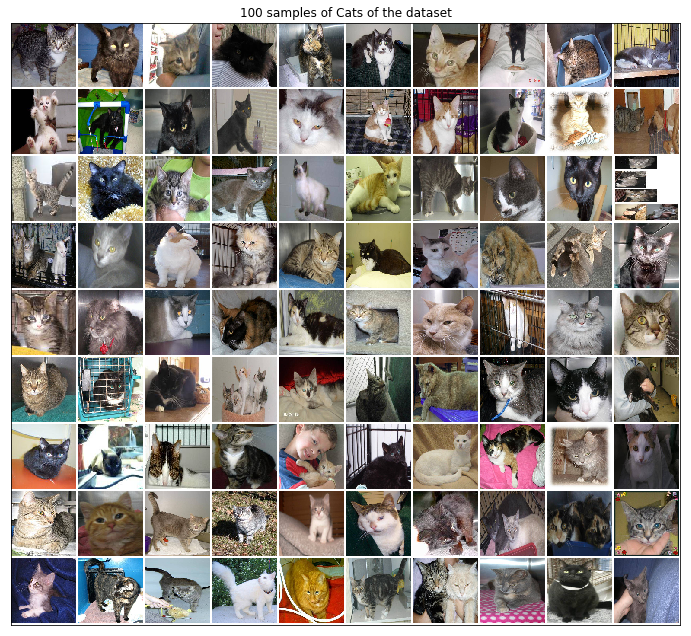

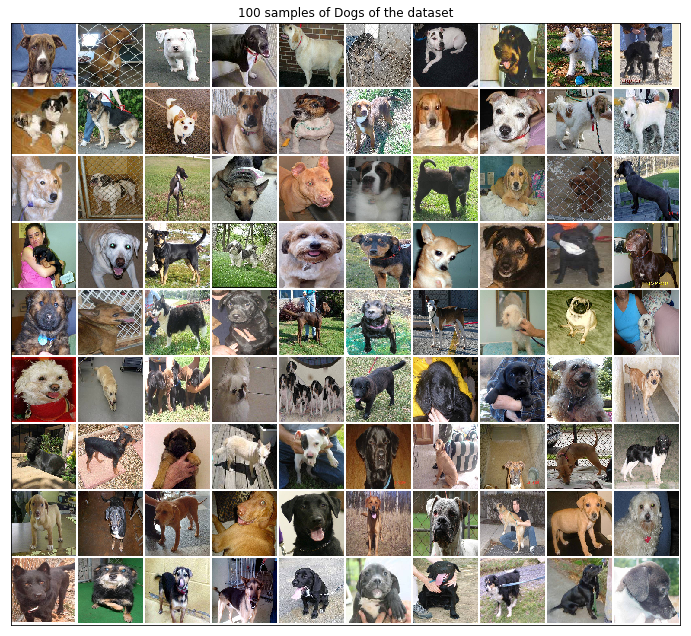

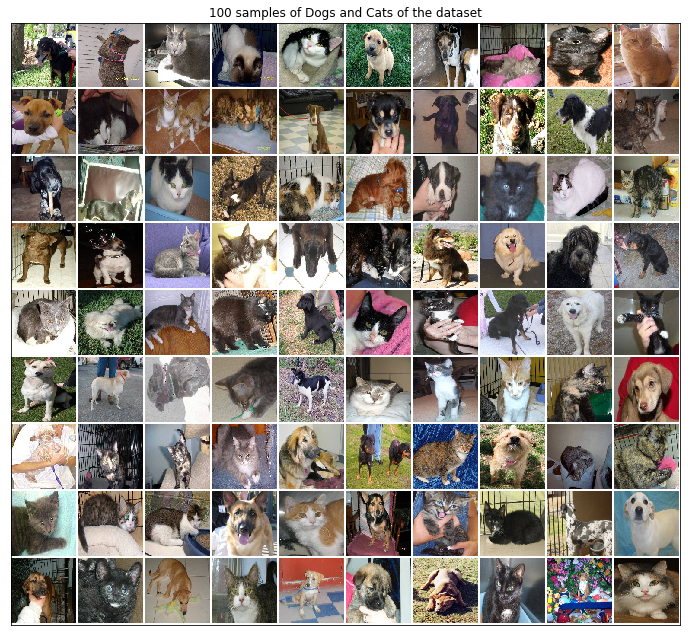

In [ ]:
show_gallery(show="cat")
show_gallery(show="dog")
show_gallery(show="both")

[Go to Content Menu](#0.)

# <a class="anchor" id="2.1."></a>2.2. Some Evaluations About the Dataset
There are  three image galleries in above figures. First one showing only images of cats, second one showing only images of dogs and third one shows images of cats and dogs.  When the images in galleries are examined, it is possible to make the following evaluations;



* There are many different types of cats
* There are many different types of dogs
* Some cat (dog) breeds are very similar to some dog (cat) breeds.
* The backgrounds in the images are very different and noisy.
* The difference in exposure of cats and dogs in the images is quite high.

The above features have the effect of making image classification difficult. In addition, the difference in light that makes image classification difficult, is little to be ignored.

[Go to Content Menu](#0.)

# <a class="anchor" id="."></a>3. Convolutional Neural Network(CNN)



In [ ]:
# 모델링 결과를 그래프로 출력하는 함수
def show_model_history(modelHistory, model_name):
    history = pd.DataFrame()
    history["Train Loss"]=modelHistory.history['loss']
    history["Validatin Loss"]=modelHistory.history['val_loss']
    history["Train Accuracy"]=modelHistory.history['accuracy']
    history["Validatin Accuracy"]=modelHistory.history['val_accuracy']
  
    history.plot(figsize=(12,8))
    plt.title(" Convulutional Model {} Train and Validation Loss and Accuracy History".format(model_name))
    plt.show()

[Go to Content Menu](#0.)

# <a class="anchor" id="3.1."></a>3.1. Implementing CNN Architecture with Keras

In [ ]:
model=models.Sequential()

# Convolution
# Feature Extractor
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(WIDTH, HEIGHT, 3))) # input image size : 150 x 150
model.add(layers.Conv2D(32, (3,3), activation="relu"))
model.add(layers.BatchNormalization())  # 정규화 ( 평균:0, 표준편차:1로 만드는 정규화 -> 오차를 줄여서 학습이 잘 되도록 !)
model.add(layers.MaxPooling2D((2,2)))   # FeatureMap Size 줄여서 깊이를 키울 수 있도록 !
model.add(layers.Dropout(0.25))         # Overfitting 방지

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 146, 146, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 69, 69, 64)       

In [ ]:
# Compile
model.compile(loss="binary_crossentropy", 
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=["accuracy"])
print("[INFO]: model compiled...")

[INFO]: model compiled...


In [ ]:
# 데이터셋 분할 (train: 0.8, test: 0.2)
dataset_train, dataset_test = train_test_split(dataset,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
dataset_train

,image_path,target
23311,../working/train/dog.6164.jpg,dog
23623,../working/train/dog.2346.jpg,dog
1020,../working/train/cat.2561.jpg,cat
12645,../working/train/cat.7233.jpg,cat
1533,../working/train/dog.12488.jpg,dog
...,...,...
21575,../working/train/cat.11344.jpg,cat
5390,../working/train/cat.8149.jpg,cat
860,../working/train/dog.305.jpg,dog
15795,../working/train/dog.4626.jpg,dog


In [ ]:
len(dataset_train)

20000

In [ ]:
dataset_test

,image_path,target
6868,../working/train/dog.1158.jpg,dog
24016,../working/train/dog.10916.jpg,dog
9668,../working/train/cat.7201.jpg,cat
13640,../working/train/cat.10896.jpg,cat
14018,../working/train/dog.1363.jpg,dog
...,...,...
8670,../working/train/dog.4718.jpg,dog
11839,../working/train/dog.9955.jpg,dog
4013,../working/train/dog.773.jpg,dog
21147,../working/train/dog.3546.jpg,dog


In [ ]:
len(dataset_test)

5000

데이터셋이 train: test = 8 : 2 로 분할된 것을 확인  
(train: 20,000개, test: 5,000개)

In [ ]:
# Data Agumentation ( Train Data )
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1./255,
shear_range=0.1,
zoom_range=0.2,
horizontal_flip=True,
width_shift_range=0.1,
height_shift_range=0.1)

# dataframe을 전달받아 증식/정규화된 데이터의 batch 생성
train_datagenerator = train_datagen.flow_from_dataframe(dataframe=dataset_train,
                                                     x_col="image_path",
                                                     y_col="target",
                                                     target_size=(WIDTH, HEIGHT),
                                                     class_mode="binary",
                                                     batch_size=150)

Found 20000 validated image filenames belonging to 2 classes.


In [ ]:
# test data는 증식되면 안되기때문에, 스케일링만 해줌 !
test_datagen=ImageDataGenerator(rescale=1./255)

# dataframe을 전달받아 정규화된 데이터의 batch 생성
test_datagenerator=test_datagen.flow_from_dataframe(dataframe=dataset_test,
                                                   x_col="image_path",
                                                   y_col="target",
                                                   target_size=(WIDTH, HEIGHT),
                                                   class_mode="binary",
                                                   batch_size=150)

Found 5000 validated image filenames belonging to 2 classes.


In [ ]:
dataset_train.shape

(20000, 2)

In [ ]:
dataset_test.shape

(5000, 2)

In [ ]:
# 모델 실행
modelHistory=model.fit_generator(train_datagenerator,
                                epochs=50,
                                validation_data=test_datagenerator,
                                validation_steps=dataset_test.shape[0]//150,  # 5000 // 150 = 33
                                steps_per_epoch=dataset_train.shape[0]//150   # 20000 // 150 = 133
                                )

Epoch 1/50
133/133 [==============================] - 167s 1s/step - loss: 0.9373 - accuracy: 0.5666 - val_loss: 1.6037 - val_accuracy: 0.5061
Epoch 2/50
133/133 [==============================] - 166s 1s/step - loss: 0.6929 - accuracy: 0.6050 - val_loss: 3.8619 - val_accuracy: 0.5056
Epoch 3/50
133/133 [==============================] - 167s 1s/step - loss: 0.6365 - accuracy: 0.6437 - val_loss: 3.6625 - val_accuracy: 0.5095
Epoch 4/50
133/133 [==============================] - 166s 1s/step - loss: 0.6098 - accuracy: 0.6706 - val_loss: 2.4207 - val_accuracy: 0.5148
Epoch 5/50
133/133 [==============================] - 165s 1s/step - loss: 0.5813 - accuracy: 0.6897 - val_loss: 2.4955 - val_accuracy: 0.5445
Epoch 6/50
133/133 [==============================] - 164s 1s/step - loss: 0.5655 - accuracy: 0.7056 - val_loss: 2.0956 - val_accuracy: 0.5530
Epoch 7/50
133/133 [==============================] - 165s 1s/step - loss: 0.5476 - accuracy: 0.7222 - val_loss: 1.5868 - val_accuracy: 0.6287

Train Accuracy:0.912
Test Accuracy:0.905


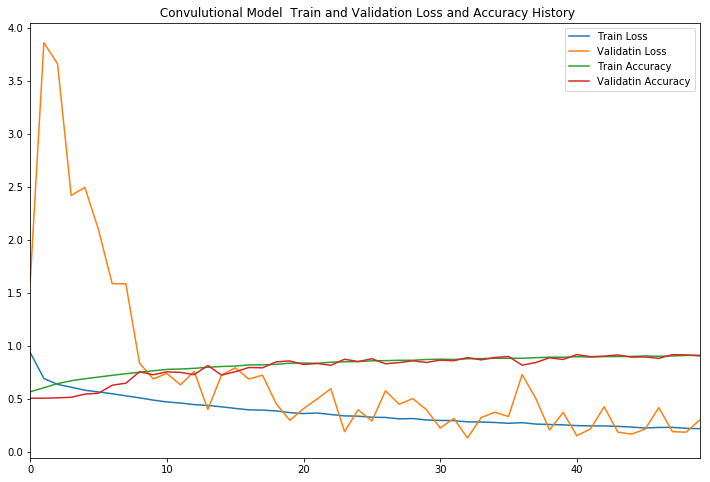

In [ ]:
print("Train Accuracy:{:.3f}".format(modelHistory.history['accuracy'][-1]))     # 마지막 epoch의 train accuracy 출력
print("Test Accuracy:{:.3f}".format(modelHistory.history['val_accuracy'][-1]))  # 마지막 epoch의 validation accuracy 출력
show_model_history(modelHistory=modelHistory, model_name="")

[Go to Content Menu](#0.)

# <a class="anchor" id="4."></a>4.Transfer Learning 1: Feature Extractor

In this section and in the next section, the use of  pretrained model on a dataset, on another dataset will be explained.

In traditional computer vision approaches, feature vectors are extracted from the images in the dataset, and these features are classified by supervised machine learning algorithms. In CNN deep learning approaches, images are given to the CNN model, which makes classification without feature extraction process. 

The only advantage of deep learning is not to make classification without using feature extractor. CNN also allows for the use of pretrained models on new datasets. This approach is called Transfer Learning. There are two different Transfer Learning approaches;

* Feature Extractor
* Fine Tunning

Transfer learning is based on the paradigm where a model previously trained on the A dataset can be used as a starting point on the B dataset. For example, a model that is trained for classification on snake and frog dataset can be used as a starting point for the classification of bear, panda and deer dataset. This can be thought of as how to find models that have been previously trained on the appropriate dataset. The models of the CNN architectures, which are featured in the image classification, are trained on "ImageNet" and are available in the keras library. These architectures can be easily used for the purpose of transfer learning on new datasets.

In [ ]:
model = applications.VGG16(weights="imagenet",  # imagenet을 사전 학습한 가중치 불러오기
                           include_top=False,   # 사전 학습된 classifier 불러오기( 동결 )
                           input_shape=(WIDTH, HEIGHT, 3))  # image size : 150 x 150
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

Since the last layer (4,4,512) is in dimensions, the length of the feature vector will be 4x4x512 = 8192.

In [ ]:
counter=0
features=list()
for path, target in zip(full_paths, targets):
    img=load_img(path, target_size=(WIDTH, HEIGHT))  # 경로를 불러와서 이미지 로드
    img=img_to_array(img)                            # 이미지를 array로 변환
    img=np.expand_dims(img, axis=0)                  # 차원 추가 ( 훈련시킬 모델에 입력할 수 있는 차원으로  )
    feature=model.predict(img)
    features.append(feature)
    counter+=1
    if counter%2500==0:
        print("[INFO]:{} images loaded".format(counter))

[INFO]:2500 images loaded
[INFO]:5000 images loaded
[INFO]:7500 images loaded
[INFO]:10000 images loaded
[INFO]:12500 images loaded
[INFO]:15000 images loaded
[INFO]:17500 images loaded
[INFO]:20000 images loaded
[INFO]:22500 images loaded
[INFO]:25000 images loaded


In [ ]:
features=np.array(features)
print("Before reshape,features.shape:",features.shape)
features=features.reshape(features.shape[0], 4*4*512)
print("After reshape, features.shape:",features.shape)

Before reshape,features.shape: (25000, 1, 4, 4, 512)
After reshape, features.shape: (25000, 8192)


In [ ]:
# OHE
le=LabelEncoder()  # label을 문자에서 숫자로 변환
targets=le.fit_transform(targets)

In [ ]:
targets

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
print("features.shape:",features.shape)
print("targets.shape:",targets.shape)

features.shape: (25000, 8192)
targets.shape: (25000,)


In [ ]:
X_train, X_test, y_train, y_test=train_test_split(features, targets, test_size=0.2, random_state=42)

[Cross Validation; 교차검증](https://homeproject.tistory.com/m/6)


- cross_val_score: 단순 교차검증
- cross_val_score(모델명, 훈련데이터, 타깃, cv)
- cv: 폴드(fold)수를 의미. 기본값은 3. 몇겹으로 교차검증을 할 것인지 설정
- ex) cv = 5 : 데이터를 5개의 부분으로 분할한 후, 각 분할마다 하나의 폴드를 test로 사용하고 나머지 4개의 폴드는 train으로 사용.
               이 과정을 반복하여 각 분할마다 정확도를 측정함.

In [ ]:
from sklearn.model_selection import cross_val_score  # 단순 교차검증

[LogisticRegression](https://blog.naver.com/gdpresent/221703566189)

매개변수
- solver :
    - liblinear : L1 제약조건, L2제약조건 두 가지를 모두 지원하며, 작은 데이터에 적합한 알고리즘
    - sag, saga : 확률적 경사하강법을 기반으로 하기때문에, 대용량 데이터에 적합한 알고리즘
                  sag는 L1제약조건만 지원하며, saga는 L1, L2 모두 지원함
    - newton-cg, lbfgs : 멀티클래스의 분류 모델에 쓰는 것. 현재까지는 이 중에서 lbfgs 알고리즘이 가장 좋다고 알려져 있으며,
                         newton-cg, lbfgs 모두 L2제약조건만 지원함
- penalty : L1, L2 제약조건을 설정하는 하이퍼파라미터. 기본값은 L2
- class_weight : 데이터에 직접 가중치를 설정하여 학습의 강도를 다르게 할 수 있는 하이퍼파라미터. 기본값은 None

In [ ]:
clf=LogisticRegression(solver="lbfgs")
print("{} training...".format(clf.__class__.__name__))

clf.fit(X_train, y_train)   # 모델 학습
y_pred=clf.predict(X_test)  # 예측 실행
print("The model trained and used to predict the test data...")

LogisticRegression training...
The model trained and used to predict the test data...


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


#### [분류 성능평가 명령](https://datascienceschool.net/03%20machine%20learning/09.04%20%EB%B6%84%EB%A5%98%20%EC%84%B1%EB%8A%A5%ED%8F%89%EA%B0%80.html)
- **accuracy_score(y_test, y_pred)**
  - 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.<br><br>
- **confusion_matrix(y_test, y_pred)**  
  - 분류 결과표  
  - 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지를 갯수로 센 결과를 표로 나타낸 것. 정답 클래스는 행(row)으로, 예측한 클래스는 열(column)로 나타냄<br><br>
- **classification_report(y_test, y_pred)**
    - 각각의 클래스를 양성(positive)클래스로 보았을때의 정밀도, 재현율, F1점수를 각각 구하고 그 평균값으로 전체 모형의 성능을 평가함
        - 정밀도(Precision) : 양성클래스에 속한다고 예측한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율. 높을수록 좋은 모형
        - 재현율(Recall)    : 실제 양성 클래스에 속한 표본 중에 양성클래스에 속한다고 예측한 표본 수의 비율. 높을수록 좋은 모형. 민감도(Sensitivity)라고도 함.
        - F1-score         : 정밀도와 재현율의 가중조화평균(weight harmonic average)을 F-score라고 하는데,
                      정밀도에 주어지는 가중치(베타)가 1인 경우를 F1 점수라고 한다. 정밀도와 재현율이 모두 클 때 커진다.

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print('-'*55)
print("Confusion Matrix:\n",metrics.confusion_matrix(y_test, y_pred))
print('-'*55)
print("Classification Report:\n",metrics.classification_report(y_test, y_pred, target_names=["cat", "dog"]))

Accuracy: 0.9468
-------------------------------------------------------
Confusion Matrix:
 [[2384  131]
 [ 135 2350]]
-------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

         cat       0.95      0.95      0.95      2515
         dog       0.95      0.95      0.95      2485

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



#### classification Report 결과 해석
- cat라고 예측한 데이터의 95%만 실제로 cat이었음 ( cat precision )
- dog라고 예측한 데이터의 95%만 실제로 dog였음 ( dog precision )
- 실제 cat인 데이터 중 95%만 cat으로 예측       ( cat recall )
- 실제 dog인 데이터 중 95%만 dog로 예측       ( dog recall )

Notice here that we are able to reach 94% classification accuracy! This number is a massive improvement from our previous best of 80% in our custom CNN model. 

Let's find cross validated score for more trusted model. 

In [ ]:
cv_scores=cross_val_score(LogisticRegression(solver="lbfgs"), features, targets, cv=3 )  # 분류모델로 LogisticRegression사용
print("Cross validation scores obtained...")

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Cross validation scores obtained...


In [ ]:
print("Cross validated scores:{}".format(cv_scores))
print("Mean of cross validated scores:{:.3f}".format(cv_scores.mean()))

Cross validated scores:[0.94948404 0.94348452 0.94611138]
Mean of cross validated scores:0.946
